# Topic Modelling: Newspaper headlines 

In [31]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS as stop_words
from gensim import models
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.datasets import fetch_20newsgroups
import pickle
import numpy as np

In [32]:
news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [33]:
#news = pd.read_csv('abcnews-date-text.csv')

In [34]:
news = pd.DataFrame(news.data, columns = ['headline_text'])

In [35]:
news

headline_text
0      I was wondering if anyone out there could enli...
1      A fair number of brave souls who upgraded thei...
2      well folks, my mac plus finally gave up the gh...
3      \nDo you have Weitek's address/phone number?  ...
4      From article <C5owCB.n3p@world.std.com>, by to...
...                                                  ...
11309  DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310  I have a (very old) Mac 512k and a Mac Plus, b...
11311  I just installed a DX2-66 CPU in a clone mothe...
11312  \nWouldn't this require a hyper-sphere.  In 3-...
11313  Stolen from Pasadena between 4:30 and 6:30 pm ...

[11314 rows x 1 columns]

In [36]:
#news.drop(axis = 'columns', labels = 'publish_date', inplace = True)

## Tokenization and Preprocessing

gensim simple_preprocess method generates lowercase tokens with any given min and max lengths

In [37]:
print(news.loc[11312].headline_text)


Wouldn't this require a hyper-sphere.  In 3-space, 4 points over specifies
a sphere as far as I can see.  Unless that is you can prove that a point
exists in 3-space that is equi-distant from the 4 points, and this may not
necessarily happen.

Correct me if I'm wrong (which I quite possibly am!)

steve
---





In [38]:
gensim.utils.simple_preprocess(news.loc[11312].headline_text, deacc = True, min_len = 4)

['wouldn',
 'this',
 'require',
 'hyper',
 'sphere',
 'space',
 'points',
 'over',
 'specifies',
 'sphere',
 'unless',
 'that',
 'prove',
 'that',
 'point',
 'exists',
 'space',
 'that',
 'equi',
 'distant',
 'from',
 'points',
 'this',
 'necessarily',
 'happen',
 'correct',
 'wrong',
 'which',
 'quite',
 'possibly',
 'steve']

Remove stopwords and preprocess

In [39]:
news['headline_text'] = news['headline_text'].str.replace('\n', ' ')

In [40]:
news.headline_text[0]

'I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is  all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail.'

In [41]:
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(doc, deacc = True, min_len = 3) if word not in stop_words] for doc in texts]

In [42]:
def remove_nonsense(texts):
    return [[word for word in doc if word.isalpha()] for doc in texts]

In [43]:
tokenize = remove_stopwords(news.headline_text)
tokenize = remove_nonsense(tokenize)
type(tokenize)

list

In [44]:
print(tokenize[0][:], "\n", tokenize[1][:], "\n", tokenize[2][:], "\n", tokenize[3][:], "\n",)

['wondering', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'small', 'addition', 'bumper', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'engine', 'specs', 'years', 'production', 'car', 'history', 'info', 'funky', 'looking', 'car', 'mail'] 
 ['fair', 'number', 'brave', 'souls', 'upgraded', 'clock', 'oscillator', 'shared', 'experiences', 'poll', 'send', 'brief', 'message', 'detailing', 'experiences', 'procedure', 'speed', 'attained', 'cpu', 'rated', 'speed', 'add', 'cards', 'adapters', 'heat', 'sinks', 'hour', 'usage', 'day', 'floppy', 'disk', 'functionality', 'floppies', 'especially', 'requested', 'summarizing', 'days', 'add', 'network', 'knowledge', 'base', 'clock', 'upgrade', 'haven', 'answered', 'poll', 'thanks'] 
 ['folks', 'mac', 'plus', 'finally', 'gave', 'ghost', 'weekend', 'starting', 'life', 'way', 'sooo', 'market', 'new', 'machine', 'bit', 'sooner', 'intended', 'looking', 'picking', 'powerbook', '

In [45]:
#tokenize[0]

## Lemmatizers

In [46]:
lemmatizer = WordNetLemmatizer()

In [47]:
def lemm(texts):
    return [[lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos = 'v'), pos = 'n') for word in doc] for doc in texts]

In [48]:
tokenize = lemm(tokenize)

Notice the changed words, verbs and nouns are reverted to their root form

In [49]:
print(tokenize[0][:], "\n", tokenize[1][:], "\n", tokenize[2][:], "\n", tokenize[3][:], "\n",)

['wonder', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'small', 'addition', 'bumper', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'engine', 'spec', 'year', 'production', 'car', 'history', 'info', 'funky', 'look', 'car', 'mail'] 
 ['fair', 'number', 'brave', 'soul', 'upgrade', 'clock', 'oscillator', 'share', 'experience', 'poll', 'send', 'brief', 'message', 'detail', 'experience', 'procedure', 'speed', 'attain', 'cpu', 'rat', 'speed', 'add', 'card', 'adapter', 'heat', 'sink', 'hour', 'usage', 'day', 'floppy', 'disk', 'functionality', 'floppy', 'especially', 'request', 'summarize', 'day', 'add', 'network', 'knowledge', 'base', 'clock', 'upgrade', 'haven', 'answer', 'poll', 'thank'] 
 ['folk', 'mac', 'plus', 'finally', 'give', 'ghost', 'weekend', 'start', 'life', 'way', 'sooo', 'market', 'new', 'machine', 'bite', 'sooner', 'intend', 'look', 'pick', 'powerbook', 'maybe', 'bunch', 'question', 'hopefully', 'somebod

## Stem

In [50]:
stemmer = SnowballStemmer('english')

In [51]:
def stem(texts):
    return [[stemmer.stem(word) for word in doc] for doc in texts]

In [52]:
tokenize = stem(tokenize)

In [53]:
print(tokenize[0][:], "\n", tokenize[1][:], "\n", tokenize[2][:], "\n", tokenize[3][:], "\n",)

['wonder', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'car', 'histori', 'info', 'funki', 'look', 'car', 'mail'] 
 ['fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'cpu', 'rat', 'speed', 'add', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'day', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day', 'add', 'network', 'knowledg', 'base', 'clock', 'upgrad', 'haven', 'answer', 'poll', 'thank'] 
 ['folk', 'mac', 'plus', 'final', 'give', 'ghost', 'weekend', 'start', 'life', 'way', 'sooo', 'market', 'new', 'machin', 'bite', 'sooner', 'intend', 'look', 'pick', 'powerbook', 'mayb', 'bunch', 'question', 'hope', 'somebodi', 'answer', 'anybodi', 'know', 'dirt', 'round', 'po

try to remove Below 2 letters 

In [54]:
def cut(texts):
    return [[word for word in doc if len(word)>=3] for doc in texts]

In [55]:
tokenize = cut(tokenize)

In [56]:
print(tokenize[0][:], "\n", tokenize[1][:], "\n", tokenize[2][:], "\n", tokenize[3][:], "\n",)

['wonder', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'car', 'histori', 'info', 'funki', 'look', 'car', 'mail'] 
 ['fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'cpu', 'rat', 'speed', 'add', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'day', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day', 'add', 'network', 'knowledg', 'base', 'clock', 'upgrad', 'haven', 'answer', 'poll', 'thank'] 
 ['folk', 'mac', 'plus', 'final', 'give', 'ghost', 'weekend', 'start', 'life', 'way', 'sooo', 'market', 'new', 'machin', 'bite', 'sooner', 'intend', 'look', 'pick', 'powerbook', 'mayb', 'bunch', 'question', 'hope', 'somebodi', 'answer', 'anybodi', 'know', 'dirt', 'round', 'po

## Method I: Bag of Words

Create a dictionary containing all unique words

In [57]:
Dictionary = corpora.Dictionary(tokenize)

print(Dictionary)

Dictionary.filter_extremes(no_below = 1)#, keep_n = 10000, 

print(Dictionary)

Dictionary(53436 unique tokens: ['addit', 'bodi', 'bricklin', 'bumper', 'call']...)
Dictionary(53436 unique tokens: ['addit', 'bodi', 'bricklin', 'bumper', 'call']...)


Create a bag of word where every word has an index and the frequency in the headline

In [58]:
corpus = [Dictionary.doc2bow(doc, allow_update=True) for doc in tokenize]

In [59]:
#corpus[0]

## Saving model (Pickle)

In [60]:
filename = 'lda_model_BOW.sav'
filename2 = 'lda_model_tdft'

In [61]:
#pickle.dump(lda_model, open(filename, 'wb'))
#pickle.dump(lda_model_tfidf, open(filename2, 'wb'))

In [62]:
LDA_BOW = pickle.load(open(filename, 'rb'))
LDA_TFIDF = pickle.load(open(filename2, 'rb'))

# LDA

In [63]:
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=Dictionary, passes=20) Super slow
lda_model = gensim.models.LdaMulticore(corpus, num_topics=20, id2word=Dictionary, passes=4, workers=2, random_state = 42) #15

In [64]:
topics = LDA_BOW.print_topics(num_words = 4)

for topic in topics:
    print(topic, "\n")

(0, '0.013*"key" + 0.008*"chip" + 0.007*"use" + 0.007*"encrypt"') 

(1, '0.013*"god" + 0.010*"peopl" + 0.008*"think" + 0.007*"say"') 

(2, '0.011*"say" + 0.009*"know" + 0.007*"peopl" + 0.006*"come"') 

(3, '0.015*"drive" + 0.009*"card" + 0.008*"use" + 0.007*"work"') 

(4, '0.010*"use" + 0.009*"window" + 0.009*"program" + 0.008*"file"') 

(5, '0.006*"bos" + 0.006*"van" + 0.005*"det" + 0.005*"tor"') 

(6, '0.008*"think" + 0.007*"moral" + 0.006*"thing" + 0.006*"know"') 

(7, '0.008*"window" + 0.006*"point" + 0.006*"look" + 0.005*"like"') 

(8, '0.011*"armenian" + 0.006*"peopl" + 0.005*"year" + 0.005*"say"') 

(9, '0.014*"israel" + 0.010*"isra" + 0.008*"file" + 0.008*"firearm"') 

(10, '0.021*"entri" + 0.014*"file" + 0.009*"program" + 0.008*"output"') 

(11, '0.011*"peopl" + 0.008*"like" + 0.007*"key" + 0.006*"think"') 

(12, '0.006*"detector" + 0.005*"year" + 0.004*"radar" + 0.004*"work"') 

(13, '0.006*"jew" + 0.005*"peopl" + 0.004*"time" + 0.004*"nazi"') 

(14, '0.020*"game" + 0.017*"te

## Model on top of the model 

0 - Tech (Secuirity)
1 - relegion
2 - opinion
3,12 - Tech (Hardware)
4,7,10,19 - Tech (Software)
6 - Science
8,9,13 - internation/middl east/danger
11 - law/government
14 - sports
15,5 - transportation
16 - finance/economy/stocks/companies
17 - Tech (Space)
18 - Tech (Social media)

In [65]:
topic_labels = {'0.013*"key" + 0.008*"chip" + 0.007*"use" + 0.007*"encrypt"':'Tech - Secuirity',
               '0.013*"god" + 0.010*"peopl" + 0.008*"think" + 0.007*"say"':'Relegion',
               '0.011*"say" + 0.009*"know" + 0.007*"peopl" + 0.006*"come"':'Opinion',
               '0.015*"drive" + 0.009*"card" + 0.008*"use" + 0.007*"work"':'Tech - Hardware',
               '0.010*"use" + 0.009*"window" + 0.009*"program" + 0.008*"file"':'Tech - Software',
               '0.006*"bos" + 0.006*"van" + 0.005*"det" + 0.005*"tor"':'Transport',
               '0.008*"think" + 0.007*"moral" + 0.006*"thing" + 0.006*"know"':'Science',
               '0.008*"window" + 0.006*"point" + 0.006*"look" + 0.005*"like"':'Tech - Software',
               '0.011*"armenian" + 0.006*"peopl" + 0.005*"year" + 0.005*"say"':'International - Middle easet',
               '0.014*"israel" + 0.010*"isra" + 0.008*"file" + 0.008*"firearm"':'International - Middle easet',
               '0.021*"entri" + 0.014*"file" + 0.009*"program" + 0.008*"output"':'Tech - Software',
               '0.011*"peopl" + 0.008*"like" + 0.007*"key" + 0.006*"think"':'law - Government',
               '0.006*"detector" + 0.005*"year" + 0.004*"radar" + 0.004*"work"':'Tech - Hardware',
               '0.006*"jew" + 0.005*"peopl" + 0.004*"time" + 0.004*"nazi"':'International - Middle east',
               '0.020*"game" + 0.017*"team" + 0.013*"year" + 0.012*"play"':'Sports',
               '0.016*"car" + 0.012*"bike" + 0.008*"like" + 0.008*"look"':'Transport',
               '0.221*"max" + 0.020*"bhj" + 0.020*"giz" + 0.012*"qax"':'Finance - Economu - Companies - Stocks',
               '0.012*"space" + 0.008*"wire" + 0.006*"use" + 0.006*"window"':'Tech - Space',
               '0.013*"post" + 0.006*"mail" + 0.006*"anonym" + 0.006*"ripem"':'Tech - Social media - Communication',
               '0.021*"edu" + 0.012*"com" + 0.009*"imag" + 0.008*"file"':'Tech -Software'}

## Method II: TF-IDF

In [66]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]

In [67]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=Dictionary, passes=4, workers=2, random_state = 42)

In [68]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic), '\n')

Topic: 0 Word: 0.004*"key" + 0.003*"encrypt" + 0.002*"chip" + 0.001*"use" + 0.001*"know" + 0.001*"program" + 0.001*"escrow" + 0.001*"secur" + 0.001*"like" + 0.001*"clipper" 

Topic: 1 Word: 0.001*"alomar" + 0.001*"ditto" + 0.001*"spell" + 0.001*"thank" + 0.001*"know" + 0.001*"think" + 0.001*"reagan" + 0.001*"like" + 0.001*"year" + 0.001*"pin" 

Topic: 2 Word: 0.002*"think" + 0.002*"know" + 0.002*"peopl" + 0.002*"like" + 0.002*"god" + 0.002*"time" + 0.002*"year" + 0.002*"good" + 0.002*"say" + 0.002*"want" 

Topic: 3 Word: 0.004*"card" + 0.004*"drive" + 0.002*"scsi" + 0.002*"driver" + 0.002*"file" + 0.002*"window" + 0.002*"thank" + 0.002*"use" + 0.002*"bus" + 0.002*"disk" 

Topic: 4 Word: 0.001*"dma" + 0.001*"max" + 0.001*"printer" + 0.001*"ink" + 0.001*"wagon" + 0.001*"opel" + 0.001*"ether" + 0.001*"winbench" + 0.001*"projector" + 0.001*"gehrel" 

Topic: 5 Word: 0.001*"mydisplay" + 0.001*"hello" + 0.001*"amorc" + 0.001*"dxf" + 0.000*"mahan" + 0.000*"tgv" + 0.000*"rectangl" + 0.000*"xter

## Testing

In [69]:
topics = LDA_TFIDF.print_topics(num_words = 5)

for topic in topics:
    print(topic, "\n")

(0, '0.004*"key" + 0.003*"encrypt" + 0.002*"chip" + 0.002*"escrow" + 0.001*"clipper"') 

(1, '0.001*"alomar" + 0.001*"ditto" + 0.001*"murray" + 0.001*"capacitor" + 0.001*"thank"') 

(2, '0.003*"know" + 0.002*"think" + 0.002*"like" + 0.002*"peopl" + 0.002*"time"') 

(3, '0.002*"scsi" + 0.002*"drive" + 0.002*"bus" + 0.002*"ide" + 0.002*"file"') 

(4, '0.001*"max" + 0.001*"printer" + 0.001*"dma" + 0.001*"ink" + 0.001*"opel"') 

(5, '0.001*"mydisplay" + 0.001*"adob" + 0.001*"winmark" + 0.001*"winbench" + 0.000*"dxf"') 

(6, '0.002*"msg" + 0.001*"food" + 0.001*"merced" + 0.001*"comic" + 0.001*"restaur"') 

(7, '0.001*"midi" + 0.001*"saab" + 0.001*"catcher" + 0.001*"tyre" + 0.001*"shrink"') 

(8, '0.004*"armenian" + 0.002*"turkish" + 0.001*"espn" + 0.001*"turk" + 0.001*"turkey"') 

(9, '0.001*"randi" + 0.001*"zeo" + 0.001*"ite" + 0.001*"moa" + 0.000*"cobb"') 



In [70]:
testing = ['The Indian women’s hockey team have scripted history! They have booked their spot in the semifinals of the Olympics for the very first time after beating Australia 1-0 in the quarterfinals. Rani Rampal and her team will face Argentina in the semis who beat Germany 3-0 in the previous quarterfinals match.',
          'Christianity began in the 1st century AD after Jesus died and was claimed to be resurrected. Starting as a small group of Jewish people in Judea, it spread quickly throughout the Roman Empire. Despite early persecution of Christians, it later became the state religion. In the Middle Ages it spread into Northern Europe and Russia. During the Age of Exploration, Christianity expanded throughout the world; it is currently the largest religion of the world.',
          'Oil prices fell on Monday as worries over Chinas economy resurfaced after a survey showing growth in factory activity slipped sharply in the worlds second-largest oil consumer, with concerns compounded by higher crude output from OPEC producers. Brent crude oil futures slid by 79 cents, or 1.06%, to $74.62 a barrel by 0945 GMT, having earlier touched a low of $74.10. U.S. West Texas Intermediate (WTI) crude futures dropped 88 cents, or 1.2%, to $73.07 after slipping to a session low of $72.77. China has been leading economic recovery in Asia and if the pullback deepens, concerns will grow that the global outlook will see a significant decline, said Edward Moya, senior analyst at OANDA. Chinas factory activity growth slipped sharply in July as demand contracted for the first time in more than a year, a survey showed on Monday.',
          'President Biden on Monday praised King Abdullah II of Jordan as a loyal and decent friend as the two leaders met at the White House, a critical visit for a Mideast leader who found himself side lined under former President Donald J. Trump. King Abdullah is the first Arab head of state to visit the White House since Mr. Biden took office, a sign that the United States wants to elevate Jordan once again to its traditional role as a regional peacemaker. We’ve been hanging out together for a long time, Mr. Biden said Monday, as the two sat in the Oval Office ahead of their bilateral meeting. It’s good to have him back in the White House.” Although Mr. Biden’s foreign policy priorities are heavily focused on China and Russia, the Middle East is a region that the new administration quickly learned it cannot afford to ignore',
          'Windows 11 has got its first beta for members of the Windows Insider Program. The new OS from Microsoft was announced last month after which the developer preview was released. Microsoft says this beta build is part of the beta cannel and it brings a host of features and improvements to the OS. While it is more stable than the previous developer preview, it still has several bugs so keep that in mind if you plan on using it on your primary PC.',
          'Gross domestic product grew at a 6.5% annual rate in the second quarter and the economy exceeded its pre-pandemic size, but slower growth is expected in coming months.',
          'Different religions may or may not contain various elements ranging from the divine,[4] sacred things,[5] faith,[6] a supernatural being or supernatural beings[7] or "some sort of ultimacy and transcendence that will provide norms and power for the rest of life".',
          'A variety of methods are deployed in politics, which include promoting ones own political views among people, negotiation with other political subjects, making laws, and exercising force, including warfare against adversaries',
          'Mutaz Essa Barshim from Qatar and Gianmarco Tamberi from Italy were the last men standing in the final of the mens high jump event on Sunday. Both had successfully cleared the 2.37 metres mark and both also couldnt clear 2.39 metres, using up all three attempts. Which served up a conundrum. Who wins? Officials offered Barshim and Tamberi two options. They could take part in jump-off, to decide a winner, or they could share the gold medal.',
          'The latest Android 12 beta is here. This is an exclusive first look at Googles all-new design with big buttons, new widgets, and more — plus all the new features including improved privacy options and an Android TV remote. Dieter Bohn walks through everything you need to know about Android 12 from Google I/O 2021.']

### Bag of Words

In [71]:
for i in range(10):
    print(testing[i], '\n')
    unseen_document = stem(lemm(remove_stopwords(testing)))[i]
    bow_vector = Dictionary.doc2bow(unseen_document)
    for index, score in sorted(LDA_BOW[bow_vector], key=lambda tup: -1*tup[1]):
        print("Score: {}\t Topic: {}".format(score, topic_labels[LDA_BOW.print_topic(index, 4)]), '\n')
    print('\n --------------------------------------------------------')

The Indian women’s hockey team have scripted history! They have booked their spot in the semifinals of the Olympics for the very first time after beating Australia 1-0 in the quarterfinals. Rani Rampal and her team will face Argentina in the semis who beat Germany 3-0 in the previous quarterfinals match. 

Score: 0.5005522966384888	 Topic: Sports 

Score: 0.24191462993621826	 Topic: International - Middle easet 

Score: 0.22205156087875366	 Topic: Tech - Hardware 


 --------------------------------------------------------
Christianity began in the 1st century AD after Jesus died and was claimed to be resurrected. Starting as a small group of Jewish people in Judea, it spread quickly throughout the Roman Empire. Despite early persecution of Christians, it later became the state religion. In the Middle Ages it spread into Northern Europe and Russia. During the Age of Exploration, Christianity expanded throughout the world; it is currently the largest religion of the world. 

Score: 0.97

In [72]:
for i in range(10):
    print(i, news.iloc[2*i].values)
    print('\n ---------------------------')
    for index, score in sorted(lda_model[corpus[2*i]], key=lambda tup: -1*tup[1]):
        print(i, "\nScore: {}\t \nTopic: {}".format(score, topic_labels[LDA_BOW.print_topic(index, 4)]))
    print('\n ---------------------------------------------------------')

0 ['I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is  all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail.']

 ---------------------------
0 
Score: 0.6991578340530396	 
Topic: Transport
0 
Score: 0.18039292097091675	 
Topic: Transport
0 
Score: 0.0960773304104805	 
Topic: Tech - Hardware

 ---------------------------------------------------------
1 ['well folks, my mac plus finally gave up the ghost this weekend after starting life as a 512k way back in 1985.  sooo, i\'m in the market for a new machine a bit sooner than i intended to be...  i\'m looking into picking up a powerbook 160 or maybe 180 and have a bunch of q

8 
Score: 0.20210176706314087	 
Topic: Tech - Software
8 
Score: 0.11253201961517334	 
Topic: law - Government

 ---------------------------------------------------------
9 ['I would like to be able to amplify a voltage signal which is output from a thermocouple, preferably by a factor of 100 or 1000 ---- so that the resulting voltage can be fed more easily into a personal-computer-based ADC data acquisition card.  Might anyone be able to point me to references to such circuits?  I have seen simple amplifier circuits before, but I am not sure how well they work in practice.  In this case, I\'d like something which will amplify sufficiently "nicely" to be used for thermocouples (say, a few degrees accuracy or better).']

 ---------------------------
9 
Score: 0.779065728187561	 
Topic: Tech - Hardware
9 
Score: 0.19838857650756836	 
Topic: Science

 ---------------------------------------------------------


### TF-IDF

In [73]:
for i in range(10):
    print(testing[i], '\n')
    unseen_document = stem(lemm(remove_stopwords(testing)))[i]
    bow_vector = Dictionary.doc2bow(unseen_document)
    for index, score in sorted(LDA_TFIDF[bow_vector], key=lambda tup: -1*tup[1]):
        print("Score: {}\t Topic: {}".format(score, LDA_TFIDF.print_topic(index, 10)), '\n')
    print('\n --------------------------------------------------------')

The Indian women’s hockey team have scripted history! They have booked their spot in the semifinals of the Olympics for the very first time after beating Australia 1-0 in the quarterfinals. Rani Rampal and her team will face Argentina in the semis who beat Germany 3-0 in the previous quarterfinals match. 

Score: 0.9239071011543274	 Topic: 0.003*"know" + 0.002*"think" + 0.002*"like" + 0.002*"peopl" + 0.002*"time" + 0.002*"thank" + 0.002*"god" + 0.002*"window" + 0.002*"year" + 0.002*"good" 

Score: 0.04066453129053116	 Topic: 0.001*"alomar" + 0.001*"ditto" + 0.001*"murray" + 0.001*"capacitor" + 0.001*"thank" + 0.001*"shark" + 0.001*"baerga" + 0.001*"spell" + 0.001*"atf" + 0.000*"printer" 


 --------------------------------------------------------
Christianity began in the 1st century AD after Jesus died and was claimed to be resurrected. Starting as a small group of Jewish people in Judea, it spread quickly throughout the Roman Empire. Despite early persecution of Christians, it later 

-----------------

## K-means clustering

### TF-IDF

In [74]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

In [75]:
detokenizer = Detok()
new_content = []

for i in range(len(tokenize)):
    text = detokenizer.detokenize(tokenize[i])
    new_content.append(text)

In [76]:
len(new_content)

11314

In [77]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(new_content)

In [78]:
print('shape: ',features.shape,'\nType: ', type(features))

shape:  (11314, 53436) 
Type:  <class 'scipy.sparse.csr.csr_matrix'>


In [79]:
#print(features)

In [80]:
Kmeans_model = KMeans(n_clusters=15, init='k-means++', max_iter=10, n_init=10)
Kmeans_model.fit(features)

KMeans(max_iter=10, n_clusters=15)

In [81]:
Kmeans_model.labels_

array([5, 3, 8, ..., 5, 2, 5])

In [82]:
order_centroids = Kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [83]:
for i in range(15):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster 0:
 game
 team
 player
 play
 year
 win
 season
 score
 hockey
 leagu
------------
Cluster 1:
 god
 christian
 jesus
 believ
 bibl
 faith
 peopl
 christ
 exist
 belief
------------
Cluster 2:
 space
 orbit
 nasa
 launch
 moon
 satellit
 lunar
 shuttl
 earth
 fund
------------
Cluster 3:
 card
 driver
 video
 bus
 monitor
 vga
 color
 ram
 window
 slot
------------
Cluster 4:
 program
 use
 line
 need
 imag
 graphic
 run
 thank
 problem
 look
------------
Cluster 5:
 car
 bike
 like
 edu
 com
 get
 look
 think
 good
 use
------------
Cluster 6:
 sale
 price
 sell
 offer
 ship
 condit
 new
 includ
 email
 manual
------------
Cluster 7:
 know
 think
 post
 like
 peopl
 time
 thing
 say
 read
 question
------------
Cluster 8:
 thank
 mac
 mail
 know
 advanc
 info
 appreci
 modem
 address
 scsi
------------
Cluster 9:
 window
 file
 program
 run
 thank
 use
 problem
 font
 version
 applic
------------
Cluster 10:
 drive
 scsi
 disk
 hard
 floppi
 ide
 control
 problem
 format
 boot


In [84]:
for i in range(10):
    print(i, news.iloc[2*i].values)
    print('\n ')
    print(Kmeans_model.labels_[2*i])
    print('\n ---------------------------------------------------------')

0 ['I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is  all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail.']

 
5

 ---------------------------------------------------------
1 ['well folks, my mac plus finally gave up the ghost this weekend after starting life as a 512k way back in 1985.  sooo, i\'m in the market for a new machine a bit sooner than i intended to be...  i\'m looking into picking up a powerbook 160 or maybe 180 and have a bunch of questions that (hopefully) somebody can answer:  * does anybody know any dirt on when the next round of powerbook introductions are expected?  i\'d heard the 185c was supposed t

In [85]:
filename3 = 'Kmeans'

In [86]:
#pickle.dump(Kmeans_model, open(filename3, 'wb'))

In [87]:
KMEANS = pickle.load(open(filename3, 'rb'))

## Clusters Ploting

### Bag of words clustering (PCA)

In [88]:
news

headline_text
0      I was wondering if anyone out there could enli...
1      A fair number of brave souls who upgraded thei...
2      well folks, my mac plus finally gave up the gh...
3       Do you have Weitek's address/phone number?  I...
4      From article <C5owCB.n3p@world.std.com>, by to...
...                                                  ...
11309  DN> From: nyeda@cnsvax.uwec.edu (David Nye) DN...
11310  I have a (very old) Mac 512k and a Mac Plus, b...
11311  I just installed a DX2-66 CPU in a clone mothe...
11312   Wouldn't this require a hyper-sphere.  In 3-s...
11313  Stolen from Pasadena between 4:30 and 6:30 pm ...

[11314 rows x 1 columns]

In [89]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors
from plotly.graph_objs import Scatter, Layout, Figure, Data, Stream, YAxis, Marker
from plotly.graph_objs import Line
from plotly.graph_objs.scatter.marker import Line
import plotly as py
import plotly.graph_objs as pgo

In [90]:
x = new_content

In [91]:
cv = CountVectorizer(analyzer = 'word', max_features = 1000000, lowercase=True, preprocessor=None, tokenizer=None)  
vectors = cv.fit_transform(x)
kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 0, max_iter=100000)
kmean_indices = kmeans.fit_predict(vectors)

In [92]:
vectors.shape

(11314, 53436)

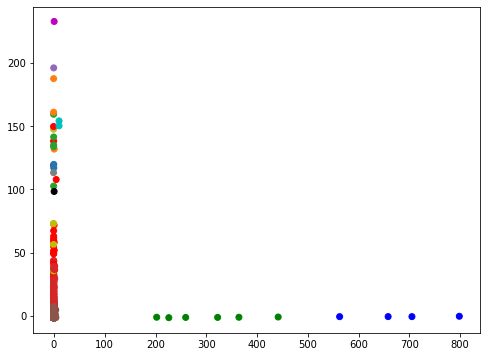

In [93]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m" ,"g","k","tab:blue","tab:green","tab:orange","tab:red","tab:purple","tab:brown","tab:olive","tab:grey"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

plt.show()

------------------

In [94]:
scatter_plot_points

array([[-0.411182  , -0.97760379],
       [-0.40998817, -0.88631502],
       [-0.42032106,  1.48482907],
       ...,
       [-0.40584239, -1.17604461],
       [-0.40935651, -1.27790439],
       [-0.40844672, -1.39085304]])

In [95]:
scatter_plot_points.shape

(11314, 2)

In [96]:
kmeans.cluster_centers_.shape

(15, 53436)

In [97]:
PCA2 = PCA(n_components=2)
cluster_centers = PCA2.fit_transform(kmeans.cluster_centers_)

In [98]:
cluster_centers.shape

(15, 2)

In [99]:
trace0 = pgo.Scatter(x=scatter_plot_points[:,0],
                     y=scatter_plot_points[:,1],
                     name='',
                     mode='markers',
                     marker=pgo.Marker(sizemode='diameter',
                                       opacity=0.5,
                                       color=kmean_indices),
                     showlegend=False
) 

C:\Users\ahmad\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning: plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.

  warnings.warn(


In [100]:
trace1 = pgo.Scatter(x=cluster_centers[:, 0],
                     y=cluster_centers[:, 1],
                     name='',
                     mode='markers',
                     marker=pgo.Marker(symbol='x',
                                       size=12),
                    showlegend=False
)
data7 = pgo.Data([trace0, trace1])
fig7 = pgo.Figure(data=data7)

C:\Users\ahmad\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  warnings.warn(


In [101]:
fig7.show()

In [102]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([   22,     4,     2,     7,     1,     6,     1,     2,     5,
            3,   212,     1, 11046,     1,     1], dtype=int64))

### TF-IDF clustering (Truncated SVD/ LSA)

In [103]:
np.unique(KMEANS.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([4533,  360,  343,  274,  377,  465,  260,  766,  188,  260,  677,
         312, 1651,  181,  667], dtype=int64))

In [104]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random

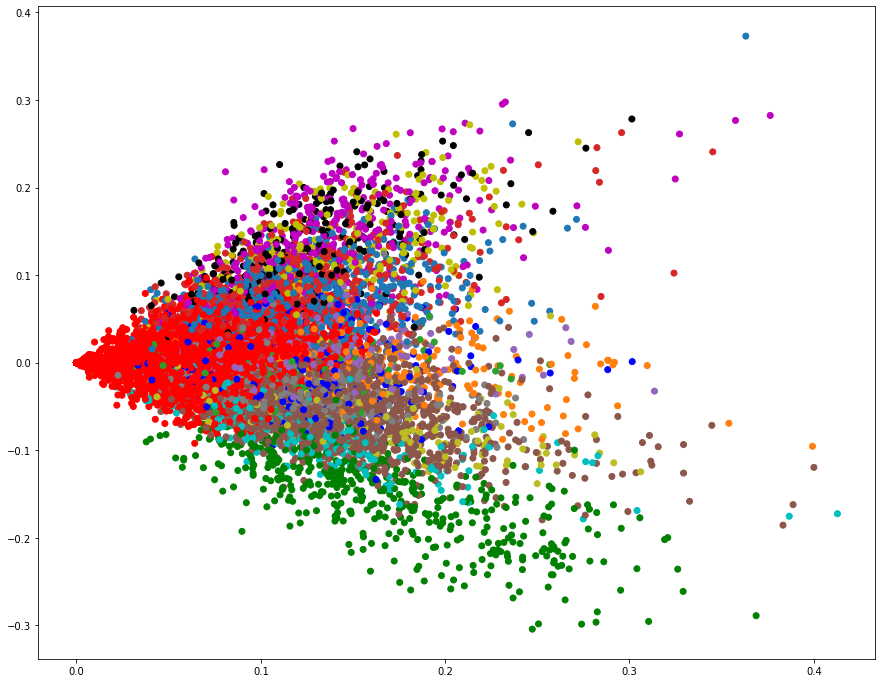

In [105]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
scatter_plot_points = svd.fit_transform(features)

colors = ["r", "b", "c", "y", "m" ,"g","k","tab:blue","tab:green","tab:orange","tab:red","tab:purple","tab:brown","tab:olive","tab:grey"]

x_axis = scatter_plot_points[:,0]
y_axis = scatter_plot_points[:,1]

fig, ax = plt.subplots(figsize=(15,12))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in KMEANS.labels_])

plt.show()

In [106]:
SVD2 = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
cluster_centers = svd.fit_transform(KMEANS.cluster_centers_)

In [107]:
trace0 = pgo.Scatter(x=scatter_plot_points[:,0],
                     y=scatter_plot_points[:,1],
                     name='',
                     mode='markers',
                     marker=pgo.Marker(sizemode='diameter',
                                       opacity=0.5,
                                       color=KMEANS.labels_),
                     showlegend=False
) 

C:\Users\ahmad\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [108]:
trace1 = pgo.Scatter(x=cluster_centers[:, 0],
                     y=cluster_centers[:, 1],
                     name='',
                     mode='markers',
                     marker=pgo.Marker(symbol='x',
                                       size=8,
                                      color='white'),
                    showlegend=False
)
data7 = pgo.Data([trace0, trace1])
fig7 = pgo.Figure(data=data7)

C:\Users\ahmad\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [109]:
fig7.show()

---------------------------

## 3D graph

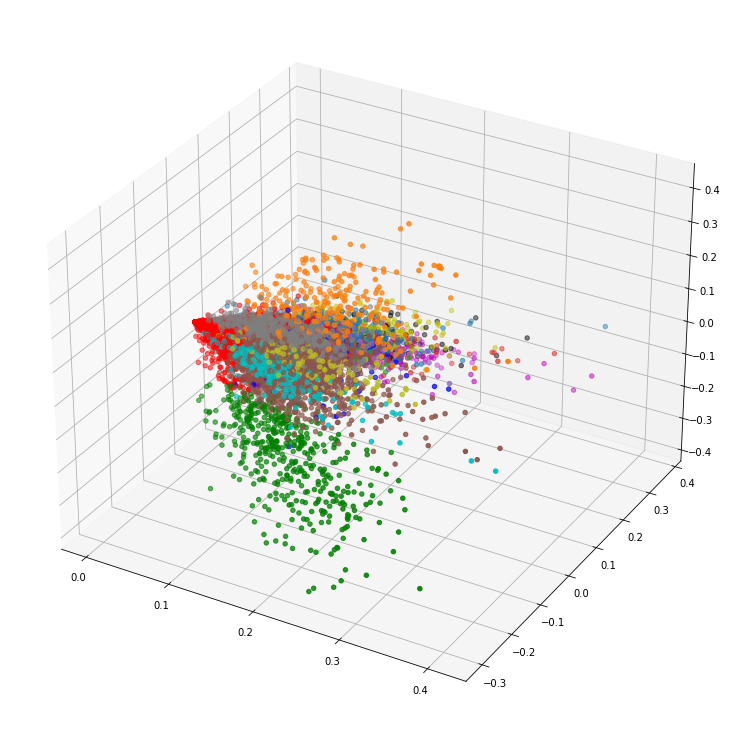

In [110]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

SVD = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
scatter_plot_points_3D = SVD.fit_transform(features)

colors = ["r", "b", "c", "y", "m" ,"g","k","tab:blue","tab:green","tab:orange","tab:red","tab:purple","tab:brown","tab:olive","tab:grey"]


fig = pyplot.figure(figsize = (15,10))
ax = Axes3D(fig)

x_axis_3D = scatter_plot_points_3D[:,0]
y_axis_3D = scatter_plot_points_3D[:,1]
z_axis_3D = scatter_plot_points_3D[:,2]

ax.scatter(x_axis_3D, y_axis_3D, z_axis_3D, c=[colors[d] for d in KMEANS.labels_])
pyplot.show()

In [111]:
import plotly.express as px

fig = px.scatter_3d(pd.DataFrame(scatter_plot_points_3D, columns=['x','y','z']), x='x', y='y', z='z', color=KMEANS.labels_)

fig.show()

-------------------

## Distance beteween 2 points (Cosine similarity)

The distance between each centoid and a point is given by .transform function

In [112]:
KMEANS.transform(features[0])

array([[0.99397292, 1.00497959, 1.02477173, 1.04152148, 1.02906861,
        1.03179244, 1.03410506, 1.00438597, 1.01898841, 1.04752103,
        1.0004959 , 0.90622775, 0.99919727, 1.03383174, 1.01082344]])

Cosine similarity is a metric that is used to quantify the similarity between two vectors (angle between them)

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
features[0].shape

(1, 53436)

In [115]:
cosine_similarity(features[0],features[1])

array([[0.01815265]])

In [116]:
KMEANS.labels_

array([11,  7,  7, ...,  7,  0,  0])

In [117]:
news.iloc[40].headline_text

"     Ted, you're missing a vital point.  As Roger Lustig pointed out in a previous response, the reason why Schott was banned from baseball was because she had been known to call and think in a racially biased manner on a constant basis.  Such thoughts affected her hiring practices.  Bonilla, on the other hand, was found to have mentioned this one word a single time.  If he had been known to go around, criticizing homosexuals, it would be a different story.  Furthermore, he is merely an athlete.  He doesn't have to hire anyone as Schott had to do.  Dave Pallone, the former NL umpire who is an admitted homosexual, has decided to assist in a protest before a Mets game at Shea.  He, like you, thinks that Bonilla should be suspended from baseball.  Pallone is hoping for a year's suspension.  In my opinion, that's downright ludicrous.  As Howie Rose on WFAN said, if you start suspending athletes who have mentioned a derogatory word even a single time under whatever conditions, then you'd p

In [118]:
news.iloc[21].headline_text

' I think that Mike Foligno was the captain of the Sabres when he got traded to the Leafs. Also, wasn\'t Rick Vaive the captain of the Leafs when he got traded to Chicago (with Steve Thomas for Ed Olcyzk and someone). Speaking of the Leafs, I believe that Darryl Sittler was their captain (he\'d torn the "C" off his jersey but I think he re-claimed the captaincy later on) when he was traded to the Flyers.  Oh yeah, of course, Gretzky was the captain of the Oilers before he was traded wasn\'t he? '

In [119]:
print(cosine_similarity(features[40], features[21]))

[[0.01164994]]


In [120]:
print(cosine_similarity(features[8000], features[21]))

[[0.0067337]]


------------------